In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy import optimize
import imageio
import os
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split

# Question 1

In this question we will use the data given in file “Social_Network_Ads.csv” which is a categorical dataset to determine whether a user purchased a product or not by using three features to determine user’s decision. Visualize the data by 3D plotting features using different colors for label 0 and 1. Use data in files “Social_Network_Ads.csv” to perform logistic regression by implementing logistic function and with available library function and compare your results. Use 90% data points from each set for training and remaining 10% for testing the accuracy of classification. Using confusion matrix find accuracy, precision, F1 score and recall.

## Code and Results

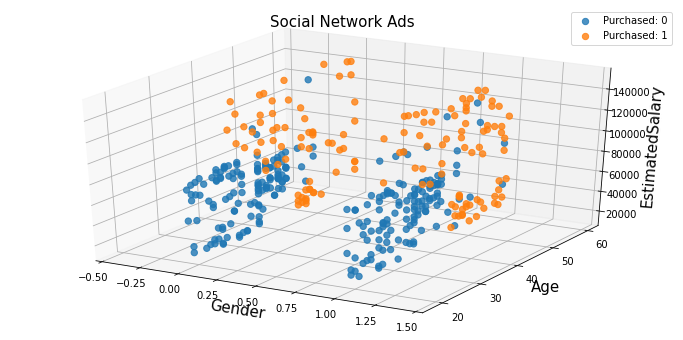

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
#print(data)
data['Gender'].replace(['Male','Female'],[0,1], inplace=True)
X = np.array(data.iloc[:,1:4])
Y = np.array(data.iloc[:,4])

#3D Plot 
x_0 = X[Y==0]
x_1 = X[Y==1]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3, alpha = 0.2)
sctt = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2],alpha = 0.8,marker ='o', s=40)
sctt = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2],alpha = 0.8,marker ='o', s=40)
plt.title("Social Network Ads", fontsize=15)
ax.set_xlabel('Gender', fontsize=15)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('Age', fontsize=15)
ax.set_zlabel('EstimatedSalary', fontsize=15)
ax.legend(['Purchased: 0','Purchased: 1'])
plt.show()


In [ ]:
# classification using logistic function
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))
    
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)
    
def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
    
X_own = data.iloc[:, 1:4]
X_own = np.c_[np.ones((X_own.shape[0], 1)), X]
Y_own = data[['Purchased']].values
theta = np.zeros((X_own.shape[1], 1))

X_train_own, X_test_own, Y_train_own, Y_test_own = train_test_split(X_own, Y_own, test_size=0.1)

parameters = fit(X_train_own, Y_train_own, theta)
parameters 

array([-1.11490128e+01, -3.64823412e-01,  2.14018990e-01,  3.18763252e-05])

In [ ]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy

accuracy(X_test_own, Y_test_own.flatten())

0.925

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)

In [ ]:
clf = LogisticRegression().fit(x_train, y_train)
y_pred = clf.predict(x_test[:, :])
print(y_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 1 1 1]
[1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0]


Text(33.0, 0.5, 'Actual')

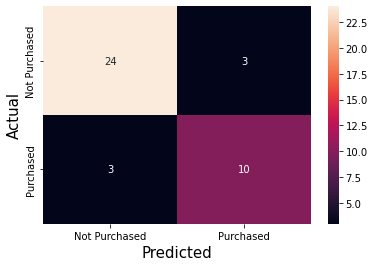

In [ ]:
#confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sns.heatmap([[tn,fp],[fn,tp]],annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)

In [ ]:
#accuracy, precision, F1 score and recall.
accuracy_inbuilt = accuracy_score(y_test, y_pred)
precision_inbuilt = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall_inbuilt = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
f1_inbuilt = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Accuracy of inbuilt model: ', accuracy_inbuilt)
print('Precision of inbuilt model: ', precision_inbuilt)
print('Recall of inbuilt model: ', recall_inbuilt)
print('F1 score of inbuilt model: ', f1_inbuilt)

Accuracy of inbuilt model:  0.85
Precision of inbuilt model:  0.85
Recall of inbuilt model:  0.85
F1 score of inbuilt model:  0.85


## Observation/ Justification

We can observe that the logistic regression implementation that we performed on our own gave better performance than the sklearn library.

# Question 2

You will work with a widely used Iris dataset. The Iris Dataset contains four features (sepal length, sepal width, petal length, and petal width) of 50 samples of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Plot features’ histogram. Compute pdf and compare it with histogram. perform the exploratory data analysis by plotting the basic statistics like mean, median, min, and max value of each feature (sepal and petal lengths and widths) for each of the three classes (setosa, virginica, and versicolor).

## Code and Results

In [6]:
data = pd.read_csv('Iris.csv')
#print(data)
X = np.array(data.iloc[:,1:5])
Y = np.array(data.iloc[:,5])
#print(X)
setosa_data = data[data['Species']=='Iris-setosa']
versicolor_data = data[data['Species']=='Iris-versicolor']
virginica_data = data[data['Species']=='Iris-virginica']

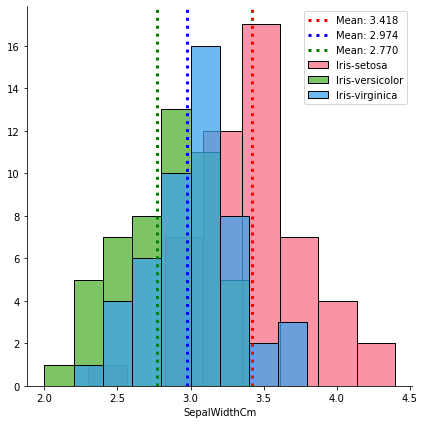

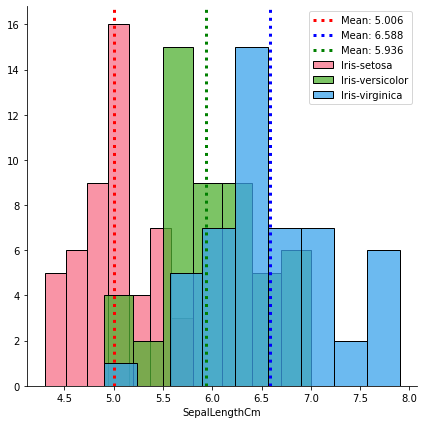

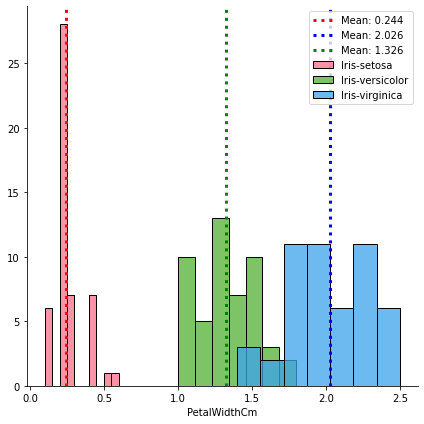

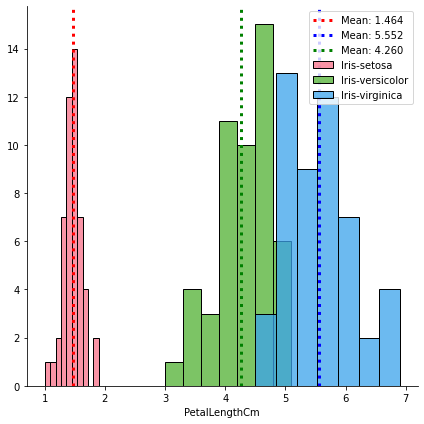

In [7]:
sns.FacetGrid(data, hue="Species", palette="husl", height=6).map(sns.histplot, "SepalWidthCm")
plt.axvline(setosa_data['SepalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_data['SepalWidthCm'].mean()))
plt.axvline(virginica_data['SepalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_data['SepalWidthCm'].mean()))
plt.axvline(versicolor_data['SepalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_data['SepalWidthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(data, hue="Species", palette="husl", height=6).map(sns.histplot, "SepalLengthCm")
plt.axvline(setosa_data['SepalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_data['SepalLengthCm'].mean()))
plt.axvline(virginica_data['SepalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_data['SepalLengthCm'].mean()))
plt.axvline(versicolor_data['SepalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_data['SepalLengthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(data, hue="Species", palette="husl", height=6).map(sns.histplot, "PetalWidthCm")
plt.axvline(setosa_data['PetalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_data['PetalWidthCm'].mean()))
plt.axvline(virginica_data['PetalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_data['PetalWidthCm'].mean()))
plt.axvline(versicolor_data['PetalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_data['PetalWidthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(data, hue="Species", palette="husl", height=6).map(sns.histplot, "PetalLengthCm")
plt.axvline(setosa_data['PetalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_data['PetalLengthCm'].mean()))
plt.axvline(virginica_data['PetalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_data['PetalLengthCm'].mean()))
plt.axvline(versicolor_data['PetalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_data['PetalLengthCm'].mean()))
plt.legend()
plt.show()
print()

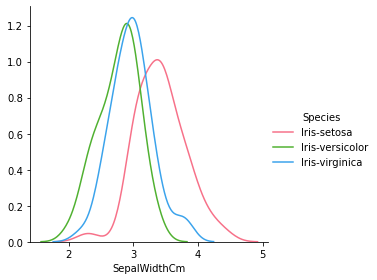

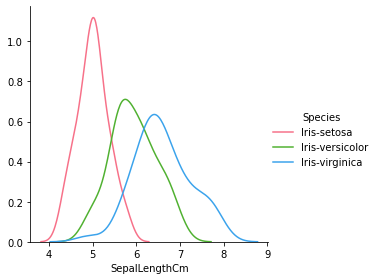

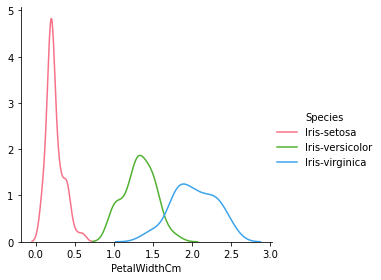

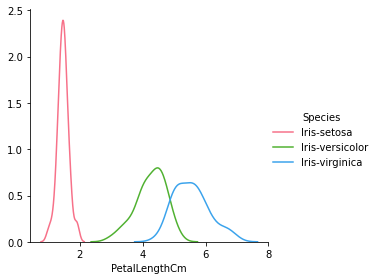

In [8]:
sns.FacetGrid(data, hue="Species", palette="husl", height=4).map(sns.kdeplot, "SepalWidthCm").add_legend()
plt.show()
print()
sns.FacetGrid(data, hue="Species", palette="husl", height=4).map(sns.kdeplot, "SepalLengthCm").add_legend()
plt.show()
print()
sns.FacetGrid(data, hue="Species", palette="husl", height=4).map(sns.kdeplot, "PetalWidthCm").add_legend()
plt.show()
print()
sns.FacetGrid(data, hue="Species", palette="husl", height=4).map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()
print()

In [9]:
#Code for basic statistics
iris=data.iloc[:,1:]
iris.groupby('Species').agg(['mean','median','min','max'])

SepalLengthCm                  SepalWidthCm                   \
                         mean median  min  max         mean median  min  max   
Species                                                                        
Iris-setosa             5.006    5.0  4.3  5.8        3.418    3.4  2.3  4.4   
Iris-versicolor         5.936    5.9  4.9  7.0        2.770    2.8  2.0  3.4   
Iris-virginica          6.588    6.5  4.9  7.9        2.974    3.0  2.2  3.8   

                PetalLengthCm                  PetalWidthCm                   
                         mean median  min  max         mean median  min  max  
Species                                                                       
Iris-setosa             1.464   1.50  1.0  1.9        0.244    0.2  0.1  0.6  
Iris-versicolor         4.260   4.35  3.0  5.1        1.326    1.3  1.0  1.8  
Iris-virginica          5.552   5.55  4.5  6.9        2.026    2.0  1.4  2.5

# Question 3

Visualize the data in the Iris Dataset by considering maximum combinations of two features in a 2D plot. Use red, green, and blue colors for labeling the three classes: Iris setosa, Iris virginica, and Iris versicolor, respectively. Comment on whether any two classes among the three can be separated by a line? Report your observations for each case.

## Code and Results

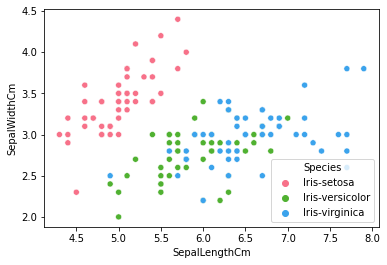

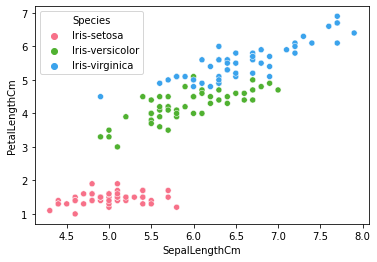

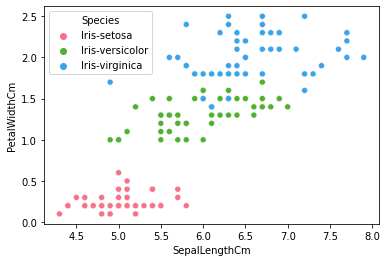

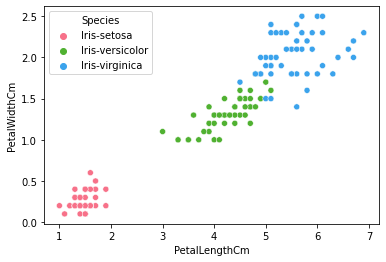

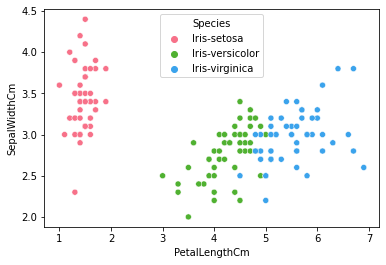

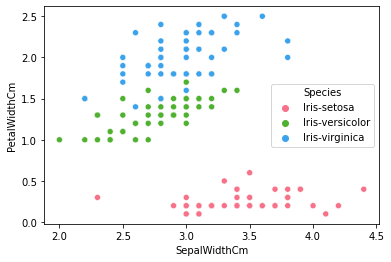

In [10]:
sns.scatterplot( x=data['SepalLengthCm'],y=data['SepalWidthCm'],data=data, hue="Species", palette="husl")
plt.show()
print()
sns.scatterplot( x=data['SepalLengthCm'],y=data['PetalLengthCm'],data=data, hue="Species", palette="husl")
plt.show()
print()
sns.scatterplot( x=data['SepalLengthCm'],y=data['PetalWidthCm'],data=data, hue="Species", palette="husl")
plt.show()

sns.scatterplot( x=data['PetalLengthCm'],y=data['PetalWidthCm'],data=data, hue="Species", palette="husl")
plt.show()

sns.scatterplot( x=data['PetalLengthCm'],y=data['SepalWidthCm'],data=data, hue="Species", palette="husl")
plt.show()
print()
sns.scatterplot( x=data['SepalWidthCm'],y=data['PetalWidthCm'],data=data, hue="Species", palette="husl")
plt.show()

## Observations/ Justification

It is easy to separated Class setosa and Class versicolor by drawing a line and we can achieve 100% train accuracy as both class dots are not overlapping with majority area of eachother. Similarly, Class setosa and Class virginica can be separated by drawing a line and can achieve a 100% train accuracy. Moreover, Class versicolor and Class Virginica are separable with a line, but it is not possible to guarantee 100% train accuracy since there are some dots overlapping. These dots near decision boundary will not guarantee completely accurate predictions.

# Question 4

Perform logistic regression on IRIS Dataset and plot confusion matrix. Using confusion matrix find accuracy, precision, F1 score and recall.

In [11]:
data['Species'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[0,1,2], inplace=True)
X_new = np.array(data.iloc[:,1:5])
Y_new = np.array(data.iloc[:,5])
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, train_size = 0.9, test_size = 0.1)

clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_pred = clf.predict(x_test[:, :])
print(y_test)
print(y_pred)

[1 2 1 2 0 0 1 2 2 0 0 0 1 0 0]
[1 2 1 2 0 0 1 2 2 0 0 0 1 0 0]


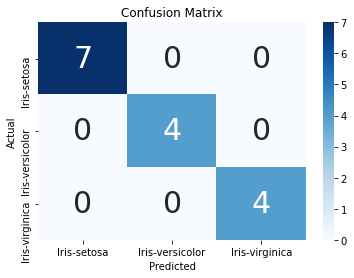

In [12]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax = plt.axes()
data_cm = cm
sns.heatmap(data_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=class_names, yticklabels=class_names)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [13]:
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average="weighted")
pr = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy    : ", ac)
print("Recall      : ", rc)
print("Precision   : ", pr)
print("F1 Score    : ", f1)

Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0


## Observation and Justification

The accuracy and precision is 100%. This means the model is able to classify the data correctly.

# Question 5

Imbalanced dataset typically refers to a dataset where the classes are not represented equally. Classification problems having multiple classes with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes the machine learning algorithms less effective, especially in predicting minority class examples.

In this question you will perform logistic regression for multiclass classification on the 20 News groups dataset. Since this dataset is a balanced one, you will perform the pre-processing to create an imbalanced version of the dataset (by removing some news articles from some groups). One example is given below. Perform multiclass classification using logistic regression on both the balanced and the imbalanced version of the dataset. Compare the performance in each case by obtaining the confusion matrix and accuracy. Report you observations at the end. You can refer to this article for a better understanding of multiclass classification using logistic regression.

In [ ]:
# balanced dataset analysis

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

vectors_test = vectorizer.transform(newsgroups_test.data)

In [ ]:
#print(newsgroups_train.groupby(['target_names']).sum())
# print(newsgroups_train.target.shape)
# print(vectors)

In [15]:
reg = LogisticRegression(max_iter=1000)
reg.fit(vectors, newsgroups_train.target)
y_pred = reg.predict(vectors_test)

In [ ]:
target_names = list(newsgroups_train.target_names)

print(metrics.f1_score(newsgroups_test.target, y_pred, average="macro"))
print(metrics.accuracy_score(y_pred, newsgroups_test.target))
print(classification_report(y_pred, newsgroups_test.target, target_names=target_names))

0.8193264991306755
0.8274030801911842
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.80      0.77       298
           comp.graphics       0.79      0.69      0.74       445
 comp.os.ms-windows.misc       0.73      0.75      0.74       384
comp.sys.ibm.pc.hardware       0.72      0.72      0.72       394
   comp.sys.mac.hardware       0.83      0.81      0.82       395
          comp.windows.x       0.74      0.83      0.78       353
            misc.forsale       0.90      0.76      0.82       464
               rec.autos       0.89      0.90      0.90       389
         rec.motorcycles       0.95      0.95      0.95       399
      rec.sport.baseball       0.92      0.88      0.90       416
        rec.sport.hockey       0.95      0.94      0.95       402
               sci.crypt       0.88      0.94      0.91       373
         sci.electronics       0.80      0.76      0.78       414
                 sci.med       0.83  

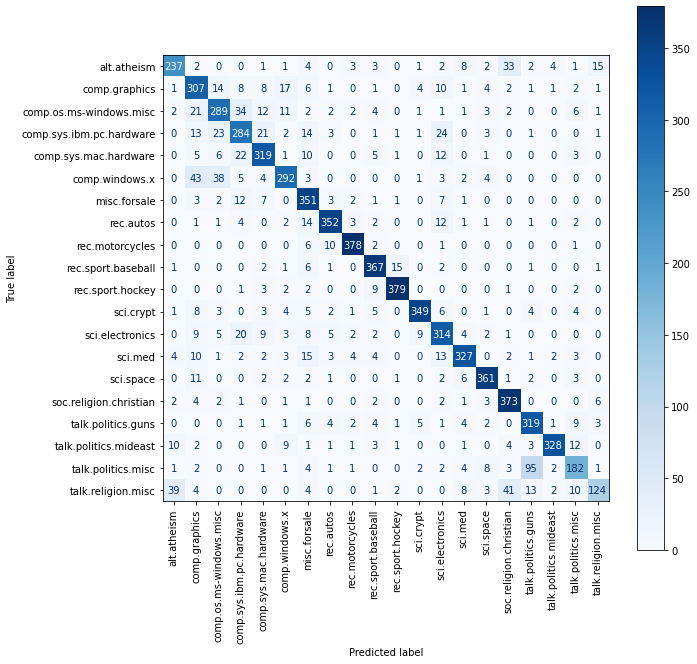

In [ ]:
cm = confusion_matrix(newsgroups_test.target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
plt.show()

# Unbalanced Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    out.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_to_csv()

In [ ]:
df_train = pd.read_csv('20_newsgroup.csv')